# Métodos de Clustering
Vamos ver algumas métodos de clustering implementados nos packages do Python.

Number of rows:  1439
     Language          Program  PowerLimit     Package        Core GPU DRAM  \
51    Haskell   imaginary/rfib          -1   47.475952   42.095032            
52    Haskell   imaginary/rfib          -1   48.505066   42.915588            
53    Haskell   imaginary/rfib          -1   48.598328   43.223206            
54    Haskell   imaginary/rfib          -1   48.029907   42.686096            
55    Haskell   imaginary/rfib          -1   47.769897   42.317566            
...       ...              ...         ...         ...         ...  ..  ...   
1144   Python     tornado_http         115  462.540405  416.843689            
1145   Python     tornado_http         115  461.453064  413.347351            
1146   Python     tornado_http         115  465.961853  419.908752            
1147   Python     tornado_http         115  458.087402  410.013428            
1149   Python     tornado_http         115  463.823303  415.765076            

       Time  Temperature  Mem

c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\sklearn\cluster\_kmeans.py:1436: User

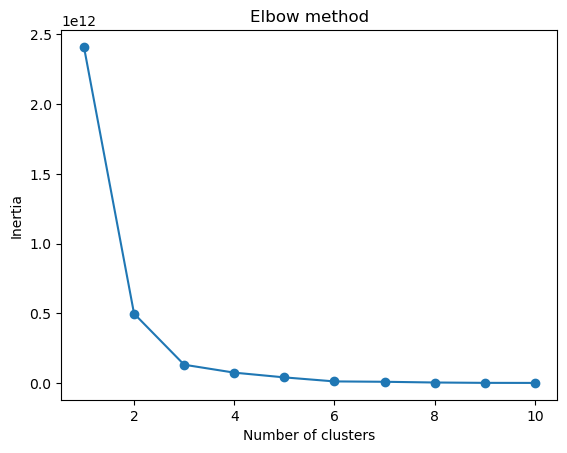

c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


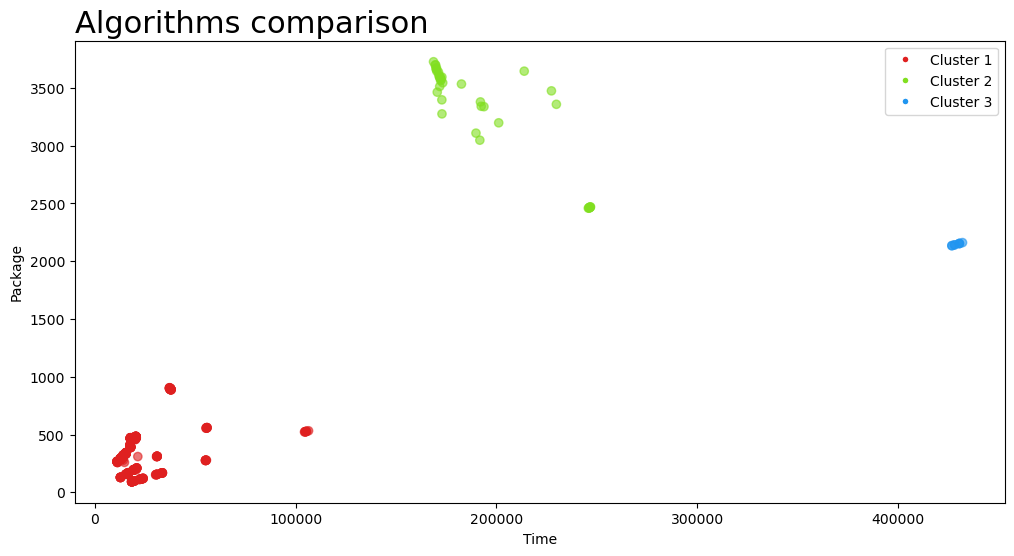

In [31]:

from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt


# Read the first dataset
df1 = pd.read_csv('../measurements_haskell.csv')

# Read the second dataset
df2 = pd.read_csv('../measurements_python.csv')

# Read the third dataset
df3 = pd.read_csv('../measurements_java.csv')

# Concatenate the datasets vertically
df = pd.concat([df1, df2, df3], ignore_index=True)

df = df[df['Package'] >= 0]


grouped = df.groupby(['Language', 'Program', 'PowerLimit'])


df_removed_entries = pd.DataFrame()


for group_name, group_df in grouped:
    
    
    best_entry_index = group_df['Time'].idxmin()
    worst_entry_index = group_df['Time'].idxmax()
    if(best_entry_index==worst_entry_index):
        worst_entry_index+=1
    
    group_df = group_df.drop([best_entry_index, worst_entry_index])
    
    
    df_removed_entries = pd.concat([df_removed_entries, group_df])

df = df_removed_entries.copy()

print("Number of rows: ", len(df.index))
print(df)

df_cluster1 = df[(df['Language'] == "Python")]
df_cluster1 = df_cluster1[['Package', 'Time']]


inertias = []
max_clusters = 10  
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(df_cluster1)
    inertias.append(kmeans.inertia_)


plt.plot(range(1, max_clusters+1), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

K_Clusters = 3  


kmeans = KMeans(n_clusters=K_Clusters, random_state=0, n_init='auto')

df_cluster1['cluster'] = kmeans.fit_predict(df_cluster1)

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df_cluster1['cen_x'] = df_cluster1['cluster'].map(lambda x: cen_x[x])
df_cluster1['cen_y'] = df_cluster1['cluster'].map(lambda x: cen_y[x])

colors = ['#DF2020', '#81DF20', '#2095F0']
df_cluster1['c'] = df_cluster1['cluster'].map(lambda x: colors[x])

plt.figure(figsize=(12,6))

column_1 = "Time"
column_2 = "Package"

plt.scatter(df_cluster1[column_1], df_cluster1[column_2], c=df_cluster1.c, alpha=0.6)


legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
                          markerfacecolor=mcolor, markersize=5) 
                   for i, mcolor in enumerate(colors)]


plt.legend(handles=legend_elements)


plt.title('Algorithms comparison', loc='left', fontsize=22)
plt.xlabel(f'{column_1}')
plt.ylabel(f'{column_2}')

plt.show()


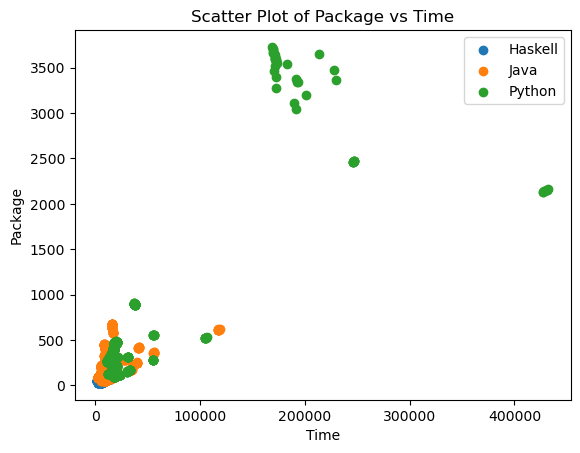

In [37]:
#import matplotlib.pyplot as plt

# Group the DataFrame by Language
grouped_df = df.groupby('Language')

# Create a scatterplot for each group
fig, ax = plt.subplots()
for name, group in grouped_df:
    ax.scatter( group['Time'], group['Package'], label=name)

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Package')
ax.set_title('Scatter Plot of Package vs Time')

# Add a legend
ax.legend()

# Show the plot
plt.show()